the magnetic field at (0.0, 0.0) is (5.723166871589495e-05, 0.0)
the height of a uniform magnetic field cylindar of radius        0.09 (m) is 0.09200000000000007 (m)


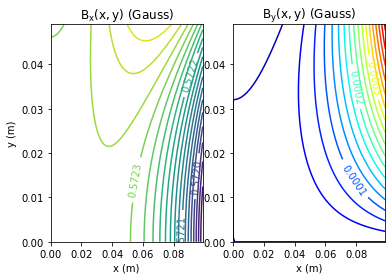

In [1]:
#Helmhlotz Magnetic Field
#Calculates the Magnetic Field near the Centre of Helmholtz Coils.
##################################################################################################################
import math                    # http://docs.python.org/library/math.html
import numpy                   # numpy.scipy.org/
import matplotlib              # matplotlib.sourceforge.net
# mlab and pyplot are MATLAB style numerical functions and plotting
from matplotlib import mlab    # matplotlib.sourceforge.net/api/mlab_api.html
from matplotlib import pyplot  # matplotlib.sourceforge.net/api/pyplot_api.html

if __name__ == "__main__":  # if run as standalone program
    """ All parameters are floats in SI units, i.e. metre, Ampere, Tesla
        x axis is defined by axis of coils
        Midpoint on x axis between coils defines origin (x,y)=(0,0)
    """

    #input the desired specifications of the helmholtz coil. Input these
    #values as floats, and in SI units.
    
    # a : coil width (in x)
    a = 0.02
    # b : coil thickness (in y)
    b = 0.02
    # ro : The difference between R and the radius of the first coil.
    #       (This allows the possibility of the two coils haveing slightly
    #       different radii.)
    ro = 0.0015
    # tao : same thing as ro but for the second coil
    tao = 0.0015
    # N : number of wire turns in one coil.
    N = 152.0
    # I : current in wire
    I = 0.251
    # R  : distance between the centres of the coils
    R = 0.6
    # M : permeability constant ("mu nought") of air
    M = 4.0 * math.pi * 0.0000001

def get_bx(x,y,a,b,ro,tao,N,I,R,M):     # define function get_bx
    """Returns the x component of the magnetic field at the point x,y,
        (formula 4a of Crosser et al.)"""
    
    #these are the formula in the article written out term by term and then
    #summed together and multiplied together in the last two lines
    t1 = (b**2 / (60.0 * R**2))
    t2 = fcx
    t3 = (x * f1x)/(125.0*R)
    t4 = (f2x * (2 * x**2 - y**2)) / (125.0 * R**2)
    t5 = (f3x*(3.0 * x * y**2 - 2.0 * x**3))/(125.0 * R**3)
    t6 = (18.0*(8.0 * x**4 - 24 * x**2 * y**2 + 3 * y ** 4))/(125.0 * R**4)
    p2 = 1 - t1 + t2 + t3 + t4 + t5 - t6
    
    return ( (8.0 * M * N * I) / (R * 5 * math.sqrt(5)) * p2)

def get_by(x,y,a,b,ro,tao,N,I,R,M):
    """Returns the y component of the magnetic field at the point x,y,
        (formula 4b of Crosser et al.)"""
    
    return ( (8.0 * M * N * I) / (R * 5 * math.sqrt(5))
            * ( (y * f1y) / (125.0 * R) + (x * y * f2y)/(125.0 * R**2)
            + (y * f3y * (4.0 * x**2 - y**2))/(125.0 * R**3)
            + (x * y * (288.0 * x**2 - 216.0 * y**2))/(125.0 * R**4)))

#: term f1x (formula 4c of Crosser et al.)
fcx = ( -(18.0 * a**4 + 13 * b**4)/(1250.0 * R**4)
    + (31.0 * a**2 * b**2)/ (750.0 * R**4)
    + ((tao + ro) / R)*(1.0/5 + (2.0 * (a**2 - b**2))/ (250 * R**2))
    - ((tao**2 + ro**2)/(250 * R**2))*(25.0 + (52 * b**2 - 62 * a**2) / R**2) 
    - (8.0 * (tao**3+ro**3)/ (25.0 * R**3))
    - (52.0 * (tao**4 + ro**4)) / (125.0 * R**4) )

#: term f1x (formula 4d of Crosser et al.)
f1x = ( ((tao - ro)/R) * (150.0 + (24.0 * b**2 - 44.0 * a**2) / R**2 )
    + (165.0 * (tao**2 - ro**2)) / R**2
    + 96 * (tao**3 - ro**3) / R**3 )

#: term f2x (formula 4e of Crosser et al.)
f2x = ( (31 * b**2 - 36 * a**2) / R**2
        + (60 * (tao + ro)) / R
        + (186 * (tao**2 + ro**2)) / R**2 )

#: term f3x (formula 4f of Crosser et al.)
f3x = (88.0 * (tao - ro)) / R

#: term f1y (formula 4g of Crosser et al.)
f1y = ( ((ro - tao) / R) * (75.0 + (12.0 * b**2 - 22.0 * a**2)/ R**2)
        + (165 * (ro**2 - tao**2)) / (2 * R**2)
        + (48 * (ro **3 - tao **3)) / R**3 )

#: term f2y (formula 4h of Crosser et al.)
f2y = ( (72 * a**2 - 62 * b **2) / R**2
        + (120 * (tao + ro))/ R
        + (372 * (tao**2 + ro**2)) / R**2 )

#: term f3y (formula 4h of Crosser et al.)
f3y = (66 * (tao - ro))/R

def get_uniformity(r,a,b,ro,tao,N,I,R,M):
    '''given the desired radius of the cylindar of uniformity r (a float), and
    floats corresponding to the coil a,b,ro,tao,N,I,R,M (defined in the body
    of the program). return the height of the cylindar of uniformity'''
    
    #find the magnetic field at the origin and initialize the x variable that
    #will be increased through iterations of the while loop
    x_origin = get_bx(0,0,a,b,ro,tao,N,I,R,M)
    y_origin = 0.0
    x = 0.0
    
    while 1 == 1:
        #set a proxy value for the radius, j and if the magnitude of the
        #magnetic field is within 0.1% of the original magnetic field for each
        #iteration and increase of the radius value j.
        j = 0.0
        
        while j < r:
            if abs( math.sqrt(get_bx(x,j,a,b,ro,tao,N,I,R,M)**2 + 
                    get_by(x,j,a,b,ro,tao,N,I,R,M)**2) - x_origin) > \
                        abs(x_origin * 0.001):
                return x
            j += 0.001
            
        x += 0.001
        

if __name__ == "__main__":
    

    #basically there are two useful operations: you can calculate the magnetic
    #field at a given point with the two functions get_bx and get_by. for
    #example: you can do this to print the desired field at the given x and y
    #(i,j) cordinates.

    x = 0.0
    y = 0.0
    print ("the magnetic field at %s is %s" % ((x,y),(
                get_bx(x,y,a,b,ro,tao,N,I,R,M),get_by(x,y,a,b,ro,tao,N,I,R,M))))
    
    #another operation you can perform with this program is find regions that
    #have a uniform magnetic field produced by the helmholtz coils. One
    #function that I created gives the height of a uniform-magnetic-field
    #cylindar of given radius r. For example:
    
    radius = 0.09
    
    print ("the height of a uniform magnetic field cylindar of radius\
        %s (m) is %s (m)" % (radius,get_uniformity(radius,a,b,ro,tao,N,I,R,M)))

    # Create contour plots of magnetic field
    x_max = 0.10  # maximum x of desired field region
    y_max = 0.05  # maximum y of desired field region
    delta = 0.001 # size of steps in x,y grid
    x = numpy.arange(0.0, x_max, delta) # create x steps
    y = numpy.arange(0.0, y_max, delta) # create y steps
    X, Y = numpy.meshgrid(x, y) # x,y grid of points where B will be calculated
    B_X = 10000.0*get_bx(X,Y,a,b,ro,tao,N,I,R,M) # X component of B in Gauss
    B_Y = 10000.0*get_by(X,Y,a,b,ro,tao,N,I,R,M) # Y component of B in Gauss

    # create figure
    B_plot = pyplot.figure()
    # create plots of B x & y components
    #     subplot(121) means one row; two columns, plot number one,
    B_plot_x = B_plot.add_subplot(121)
    # Create a contour plot of B_X(X,Y), with 20 contour steps
    Bx = pyplot.contour(X, Y, B_X, 20)
    # choose san serif ('sf')for math mode fonts (see
    #    http://matplotlib.sourceforge.net/users/customizing.html#customizing-matplotlib)
    matplotlib.rc('mathtext',default='sf') 
    pyplot.clabel(Bx, Bx.levels[::4], inline=1, fontsize=10, fmt='%1.4f')
        # inline = 1 removes contour lines beneath labels
        # levels[::4] labels every 4th contour line
    pyplot.title('$B_x(x,y)$ $(Gauss)$')
    pyplot.xlabel('x (m)')
    pyplot.ylabel('y (m)')
    B_plot_y = B_plot.add_subplot(122)
    # Create a contour plot of B_Y(X,Y), with 20 contour steps, using
    #       gist_rainbow colourmap
    #       (see http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps)
    By = pyplot.contour(X, Y, B_Y, 20, cmap=matplotlib.cm.jet)
    pyplot.clabel(By, By.levels[::4], inline=1, fontsize=10, fmt='%1.4f')
    pyplot.title('$B_y(x,y)$ $(Gauss)$')
    pyplot.xlabel('x (m)')
    pyplot.show()  # display figure